# Project 2

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2020:

    1. How much does the UK export and import and is the balance positive (more exports than imports)?
    2. Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
    3. Which are the regular customers, i.e. which countries buy milk from the UK every month?
    4. Which countries does the UK both import from and export to?
    
I choose 2020 to see the impact of the COVid19 pandemic on trade in the UK. Ready? Lets do this    

# Getting and preparing the data
he data is obtained from the United Nations http://comtrade.un.org/data/, by selecting the following configuration:

    1. Type of Product: goods
    2. Frequency: monthly
    3. Periods: January to May of 2020
    4. Reporter: United Kingdom
    5. Partners: all
    6. Flows: imports and exports
    7. HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)
Clicking on 'Preview' results in a message that the data exceeds 500 rows. Data was downloaded using the Download CSV button and the download file renamed appropriately.

In [4]:
import pandas as pd
trade = pd.read_csv('C:\\Users\\hp\\Documents\\Downloads\\comtrade.csv', dtype={'Commodity Code':str})
trade.head()
#On reading in the data, the commodity code has to be read as a string, to not lose the leading zero.

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2020,202001,January 2020,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,446708,NaN,505945,NaN,NaN,0
1,HS,2020,202001,January 2020,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,286,NaN,3048,NaN,NaN,0
2,HS,2020,202001,January 2020,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,24315,NaN,148700,NaN,NaN,0
3,HS,2020,202001,January 2020,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,558097,NaN,940447,NaN,NaN,0
4,HS,2020,202005,May 2020,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,1251582,NaN,1009923,NaN,NaN,0


In [9]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
trade = trade[headings]
trade.head()



,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,202001,Netherlands,Exports,unprocessed,505945
1,202001,Switzerland,Exports,unprocessed,3048
2,202001,United States of America,Exports,unprocessed,148700
3,202001,France,Exports,unprocessed,940447
4,202005,France,Imports,unprocessed,1009923


The data only covers the first five months of 2020. Most of the columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. The commodity code is transformed into a short but descriptive text and only the relevant columns are selected in the above code

The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [12]:
trade = trade[trade[PARTNER] != 'World']
trade.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,202001,Netherlands,Exports,unprocessed,505945
1,202001,Switzerland,Exports,unprocessed,3048
2,202001,United States of America,Exports,unprocessed,148700
3,202001,France,Exports,unprocessed,940447
4,202005,France,Imports,unprocessed,1009923


# Total trade flow
To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?', the dataframe is split into two groups: exports from the UK and imports into the UK. The trade values within each group are summed up to get the total trading.

In [13]:
grouped = trade.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    120843634
Imports     59887514
Name: Trade Value (US$), dtype: int64

Wow! even in the pandemic, the exports exceeded imports by 100 million dollars!

Lets plot a bargraph to visualize this better. 

# Main Trade Partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [20]:
imports = trade[trade[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 10 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head(10)

The UK imports from 22 countries.
The 10 biggest exporters to the UK are:


Partner
Ireland        26965551
Germany         9336787
Netherlands     6983630
Belgium         5900714
France          4737368
Spain           2581252
Poland          1716323
Bulgaria         438451
Sweden           342674
Lithuania        219677
Name: Trade Value (US$), dtype: int64

Oh okay, i bet its only Africa where China is the number 1 import country. haha.

Lets plot a bargraph to visualize this better. 

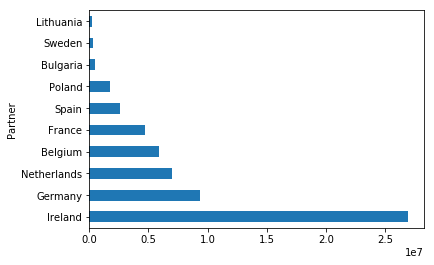

In [21]:
totalImports.head(10).plot(kind='barh')

In [19]:
exports = trade[trade[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 10 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head(10)

The UK exports to 92 countries.
The 10 biggest importers from the UK are:


Partner
Ireland          46879247
Netherlands      16438956
China             9118409
Algeria           6495341
Germany           5497839
France            3966752
Poland            3509110
Belgium           2836403
Côte d'Ivoire     2406655
Egypt             1885625
Name: Trade Value (US$), dtype: int64

# Regular importers

Given that there are two commodities, the third question, 'Which are the regular customers, i.e. which countries buy milk from the UK every month?', is meant in the sense that a regular customer imports both commodities every month. This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [25]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)


# Bi-directional trade
To address the fourth question, 'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country.

In [40]:
Highcountries = pd.pivot_table(trade, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
Lowcountries = pd.pivot_table(trade, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
a = Highcountries.sort_values(by=['Exports'], inplace=True, ascending=False)
b = Highcountries.sort_values(by=['Imports'], inplace=True, ascending=False)
c = Lowcountries.sort_values(by=['Exports'], inplace=True)
d = Lowcountries.sort_values(by=['Exports'], inplace=True)

Highcountries.head(5)
                             
                              

Trade Flow,Exports,Imports
Partner,,
Ireland,46879247.0,26965551.0
Germany,5497839.0,9336787.0
Netherlands,16438956.0,6983630.0
Belgium,2836403.0,5900714.0
France,3966752.0,4737368.0


In [41]:
Lowcountries.head(5) 

Trade Flow,Exports,Imports
Partner,,
Croatia,15.0,NaN
Bulgaria,103.0,438451.0
Estonia,110.0,61626.0
Luxembourg,152.0,15723.0
Slovakia,167.0,45246.0


# Conclusions

Our analysis shows that in 2020, Ireland was the main trading partner with UK in milk products with the highest imports and exports surpassing other countries by hundrends of millions. Damn!

The UK exported the least milk products to Croatia and imported none from them. 

The export value exceeds the import value for UK by hundrend of million US dollars. 